## Základné nastavenia

Importujeme potrebné knižnice. Nasledujúci odstavec by mal byť spustený ako prvý predtým ako sa budú používať importované objekty `pd`, `np`, `plt` a `sns`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()

## Možnosti pre načítavanie a zápis dát

Knižnica `pandas` podoruje čítanie a zápis dát z rôznych formátov, ako napr. z textových CSV súborov, alebo súborov programu Microsoft Excel. Pre každý z podporovaných formátov je možné zmeniť nastavenia, ako napr. znak pre oddeľovať hodnôt, desatinnú čiarku, alebo či súbor obsahuje na prvom riadku hlavičku s názvami stĺpcov/atribútov.

Viac o možnostiach načítavania a zápisu dát v knižnici `pandas` si môžete prečítať [tu](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) (v angličtine).

In [2]:
# pre CSV súbory viete zmeniť napr. oddeľovač hodnôt (parameter `delimiter`) a znak desatinnej čiarky (`decimal`)
# ak sa v súbore nenacháza hlavička s názvami atribútov na prvom riadku (parameter `header=None`), atribúty je možné pomenovať
# v parametre `names`
data = pd.read_csv("../data/iris.csv", delimiter=";", decimal=",", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,5.1,5.1,5.1,setosa
1,4.9,4.9,4.9,4.9,setosa
2,4.7,4.7,4.7,4.7,setosa
3,4.6,4.6,4.6,4.6,setosa
4,5.0,5.0,5.0,5.0,setosa


In [4]:
# podobne môžete načítať dáta z Excel súboru (štandardne sa načíta dátová tabuľka z prvého zošitu)
data = pd.read_excel("../data/iris.xlsx")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,5.1,5.1,5.1,setosa
1,4.9,4.9,4.9,4.9,setosa
2,4.7,4.7,4.7,4.7,setosa
3,4.6,4.6,4.6,4.6,setosa
4,5.0,5.0,5.0,5.0,setosa


Pre zápis dát do súboru použite priamo metódy dátového rámca.

In [5]:
# štandardne sa do súboru zapíše aj stĺpec s indexmi riadkov, ak chceme zapísať iba atribúty bez indexu, nastavíme `index=False`
data.to_csv("../data/iris_processed.csv", index=False)

In [6]:
# pri zápise si môžeme zvoliť, ktoré atribúty sa zapíšu
data.to_excel("../data/iris_processed.xlsx", index=False, columns=["sepal_length", "sepal_width"])

## Spájanie tabuliek

Pre základné spájanie dát slúži metóda `concat`, ktorá umožňuje spojiť dáta po riadkoch, alebo po stĺpcoch zarovnaných podľa indexov jednotlivých riadkov. Knižnica `pandas` ďalej umožňuje spájanie tabuliek pomocou kľúčov podobne ako je to v relačných databázach pomocou jazyka SQL.

In [7]:
# najprv si načítame a predspracujeme dáta s ktorými budeme pracovať: World Happiness Report z rokoch 2015 a 2016
data_2015 = pd.read_csv("../data/2015.csv") # dáta za rok 2015
data_2015 = data_2015[["Country", "Rank", "Score"]] # vyberieme iba stĺpce `Country`, `Rank` a `Score`
# stĺpce `Rank` a `Score` si premenujeme na `Rank 2015` a `Score 2015`
data_2015 = data_2015.rename(columns={"Rank":"Rank 2015", "Score":"Score 2015"})
data_2015.head()

,Country,Rank 2015,Score 2015
0,Switzerland,1,7.587
1,Iceland,2,7.561
2,Denmark,3,7.527
3,Norway,4,7.522
4,Canada,5,7.427


In [8]:
# podobne si predspracujeme dáta za rok 2016
data_2016 = pd.read_csv("../data/2016.csv")
data_2016 = data_2016[["Country", "Rank", "Score"]]
data_2016 = data_2016.rename(columns={"Rank":"Rank 2016", "Score":"Score 2016"})
data_2016.head()

,Country,Rank 2016,Score 2016
0,Denmark,1,7.52560
1,Switzerland,2,7.50866
2,Iceland,3,7.50139
3,Norway,4,7.49758
4,Finland,5,7.41349


In [9]:
# ak použije na spájanie metódu `concat` podľa stĺpcov (`axis=1`), dáta sa spoja podľa poradia v riadkoch
# ak sa odlišuje počet riadkov v spájaných tabuľkách, dáta sa doplnia chýbajúcimi hodnotami
data_all = pd.concat([data_2015, data_2016], axis=1)
data_all.tail()

,Country,Rank 2015,Score 2015,Country,Rank 2016,Score 2016
153,Rwanda,154,3.465,Afghanistan,154.0,3.35976
154,Benin,155,3.340,Togo,155.0,3.30256
155,Syria,156,3.006,Syria,156.0,3.06910
156,Burundi,157,2.905,Burundi,157.0,2.90453
157,Togo,158,2.839,NaN,NaN,NaN


In [10]:
# pre spájanie tabuliek podľa kľúčov použijeme metódu `merge`
# v základných parametroch nastavíme spájané dáta (pravú a ľavú tabuľku) a atribúty, ktoré sa použijú ako kľúč
data_all = pd.merge(left=data_2015, right=data_2016, left_on="Country", right_on="Country")
data_all.tail()

,Country,Rank 2015,Score 2015,Rank 2016,Score 2016
146,Rwanda,154,3.465,152,3.51509
147,Benin,155,3.340,153,3.48366
148,Syria,156,3.006,156,3.06910
149,Burundi,157,2.905,157,2.90453
150,Togo,158,2.839,155,3.30256


In [11]:
# skontrolujeme si počet riadkov a chýbajúcich hodnôt v spojenej tabuľke
print(len(data_2015), len(data_2016), len(data_all))
data_all.isna().sum()

158 157 151


Country       0
Rank 2015     0
Score 2015    0
Rank 2016     0
Score 2016    0
dtype: int64

Štandardne sa pri spájaní do výslednej tabuľky zahrnú iba tie riadky, ktorých kľúč sa nachádzal v oboch spájaných tabuľkách (tzn. metóda `inner`). Ďalšie možnosti sú podobné ako v jazyku SQL:

| Metóda merge | SQL | Popis |
| --- | --- | --- |
| left | LEFT OUTER JOIN | Iba kľúče z ľavej tabuľky |
| right | RIGHT OUTER JOIN | Iba kľúče z pravej tabuľky |
| outer | FULL OUTER JOIN | Vyber dáta ak majú kľúč v pravej alebo v ľavej tabuľke (zjednotenie) |
| inner | INNER JOIN | Vyber dáta ak majú kľúč aj v pravej aj v ľavej tabuľke (prienik) |


In [12]:
# spájanie podľa kľúčov ľavej tabuľky (ak sa kľúč nenachádza v pravej tabuľke, doplnia sa chýbajúce hodnoty)
data_all = pd.merge(left=data_2015, right=data_2016, left_on="Country", right_on="Country", how="left")
print(len(data_2015), len(data_2016), len(data_all))
data_all.isna().sum()

158 157 158


Country       0
Rank 2015     0
Score 2015    0
Rank 2016     7
Score 2016    7
dtype: int64

In [13]:
# zjednotenie hodnôt z oboch tabuliek
data_all = pd.merge(left=data_2015, right=data_2016, left_on="Country", right_on="Country", how="outer")
print(len(data_2015), len(data_2016), len(data_all))
data_all.isna().sum()

158 157 164


Country       0
Rank 2015     6
Score 2015    6
Rank 2016     7
Score 2016    7
dtype: int64

## Normalizovanie dát

Pri niektorých metódach analýzy dát je potrebné porovnávať hodnoty atrubútov v rovnakých rozsahoch, tzn. dáta je potrebné *normalizovať*. Jedna zo základných metód je prevod do zvoleného intervalu (najčastejšie 0-1). Pre normalizovanie dát budeme používať objekty z knižnice `sklearn`, ktorá obsahuje viacero pokročilých metód a algoritmov pre analýzu dát.

In [17]:
# naimportujeme si potrebné objekty z knižnice `sklearn`
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# načítame si dátovú množinu `iris`
iris = pd.read_csv("../../6 hodina/data/iris.csv")
# do premennej `iris_data` si uložíme číselné atribúty
iris_data = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
# označenie druhov (triedy) si uložíme do premennej `iris_data`
iris_labels = iris["species"]

In [18]:
# pre normalizáciu dát do intervalu 0-1 použijeme objekt MinMaxScaler
# vytvoríme si objekt normalizácie
min_max = MinMaxScaler()
# transformujeme dáta, výsledok je číselné pole knižnice `numpy`, ktoré nazad prevedieme na dátový rámec `pandas`
norm_array = min_max.fit_transform(iris_data)
# vytvoríme nový dátový rámec z `numpy` poľa, názvy stĺpcov zachováme z pôvodnej množiny `iris_data`
iris_data_norm = pd.DataFrame(norm_array, columns=iris_data.columns)
iris_data_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


*Štandardizácia* je špeciálna metóda normalizácie dát, kedy sa dáta prepočítajú tak, aby mali 0 strednú hodnotu (priemer) a 1 štandardnú odchýlku (resp. rozptyl). Pri prepočte sa od každej pôvodnej hodnoty odpočíta priemer pre celý stĺpec a výsledok sa vydelí štandardnou odchýlkou pôvodných dát.

In [20]:
standard = StandardScaler()
std_array = standard.fit_transform(iris_data)
iris_data_std = pd.DataFrame(std_array, columns=iris_data.columns)
iris_data_std.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


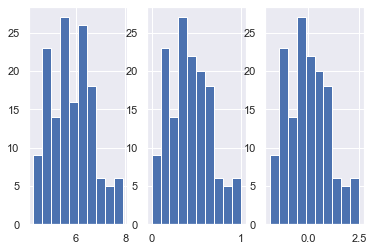

In [21]:
# vykreslíme si histogram pôvodných, normalizovaných a štandardizovaných dát pre atribút `sepal_length`
# vytvoríme si obrázok rozdelený na 1 riadok a 3 stĺpce, v každom stĺpci zobrazíme jeden histogram
fig, axis = plt.subplots(1, 3)
pl = iris_data["sepal_length"].hist(ax=axis[0]) # `ax` parameter určuje v ktorej časti obrázka sa graf zobrazí
pl = iris_data_norm["sepal_length"].hist(ax=axis[1])
pl = iris_data_std["sepal_length"].hist(ax=axis[2])

## Vizualizácia dát pomocou metódy hlavných komponentov

Vizualizácia je veľmi užitočný nástroj pri analýze dát. Hlavným obmedzením pri vizualizácii dát je to, že je možné zobraziť iba dvoj a trojrozmerné grafy, tzn. naraz si v jednom grafe vieme zobraziť iba závislosti medzi 2-3 atribútmi (ďalšie atribúty môžeme použiť pre vykreslenie ďalších vizuálnych aspektov ako je napr. farba alebo veľkosť bodov a pod.)

Ak si chceme naraz vizualizovať dáta s väčším počtom atribútov, musíme dátovú množinu premietnuť do menej rozmerného 2, alebo 3 rozmerného priestoru. Jednou z metód projekcie dát je metóda hlavných komponentov (*Principal Component Analysis* - PCA), ktorá sa snaží nájsť také premietnutie hodnôt atribútov, ktoré zachová čo najviac vzájomných vzťahov z pôvodných dát. Metóda PCA vypočíta z pôvodných atribútov nové atribúty - tzv. *hlavné komponenty*, ktoré sú usporiadané podľa toho, koľko informácií z pôvodných dát sa do nich premietne. Pre vizualizáciu si vypočítame a zobrazíme závislosť dvoch najdôležitejších komponentov, aby sme zobrazili čo najviac pôvodných vzťahov v dátach.

In [22]:
# z knižnice `sklearn` si naimportujeme PCA metódu
from sklearn.decomposition import PCA

# vypočítame iba dva najdôležitejšie hlavné komponenty
pca = PCA(n_components=2)
pca_array = pca.fit_transform(iris_data_norm)
# výsledok je `numpy` číselné pole, ktoré si skonvertujeme na dátový rámec `pandas`
# stĺpce si pomenujeme `komponent_1` a `komponent_2`
iris_data_pca = pd.DataFrame(pca_array, columns=["komponent_1", "komponent_2"])

# zobrazíme si ako vyzerajú príklady po premietnutí, hodnoty komponentov už nevieme jednoducho interpretovať
iris_data_pca.head()

,komponent_1,komponent_2
0,-0.630361,0.111556
1,-0.623546,-0.100313
2,-0.669793,-0.047220
3,-0.654633,-0.098791
4,-0.648263,0.137558


In [23]:
# zobrazíme si, koľko informácií (variancie) v pôvodných dátach je premietnutých do jednotlivých komponentov
pca.explained_variance_ratio_

array([0.84141901, 0.11732474])

In [24]:
# spočítame si percentuálne koľko informácií je celkovo v prvých dvoch hlavných komponentoch, ktoré vizualizujeme
print("{0:.4f}".format(np.sum(pca.explained_variance_ratio_) * 100))

95.8744


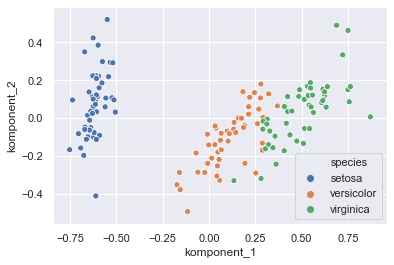

In [25]:
# spojíme si premietnuté dáta s pôvodnými označeniami príkladov a zobrazíme si dáta na X-Y grafe
# farbu vykreslíme podľa priradenie do jednotlivých druhov rastlín
iris_pca = pd.concat([iris_data_pca, iris_labels], axis=1)
pl = sns.scatterplot(data=iris_pca, x="komponent_1", y="komponent_2", hue="species")

## Úlohy

### Úloha 8.1

Načítajte dáta World Happiness Record 2016 a 2017.

* Vyberte iba atribúty `Country`, `Score` a `Rank`.
* Spojte tabuľky podľa názvu štátu tak aby tam boli všetky hodnoty z oboch tabuliek. Atribúty `Score` a `Rank` vhodne premenujte podľa roku.
* Pridajte nový atribút `Diff` ktorého hodnoty budú rovné `Score 2017` - `Score 2016`
* Zobrazte histogram atribútu `Diff`.

V roku 2017 je viac štátov, ktoré sa zlepšili, alebo zhoršili?

In [45]:
data_2016 = pd.read_csv("../data/2016.csv")
data_2016 = data_2016[["Country", "Rank", "Score"]]
data_2016 = data_2016.rename(columns={"Rank":"Rank 2016", "Score":"Score 2016"})
data_2016.head()

data_2017 = pd.read_csv("../data/2017.csv")
data_2017 = data_2017[["Country", "Rank", "Score"]]
data_2017 = data_2017.rename(columns={"Rank":"Rank 2017", "Score":"Score 2017"})
data_2017.head()

data_all = pd.merge(left=data_2016, right=data_2017, left_on="Country", right_on="Country", how="outer")
data_all.head()


,Country,Rank 2016,Score 2016,Rank 2017,Score 2017
0,Denmark,1.0,7.52560,2.0,7.522
1,Switzerland,2.0,7.50866,4.0,7.494
2,Iceland,3.0,7.50139,3.0,7.504
3,Norway,4.0,7.49758,1.0,7.537
4,Finland,5.0,7.41349,5.0,7.469


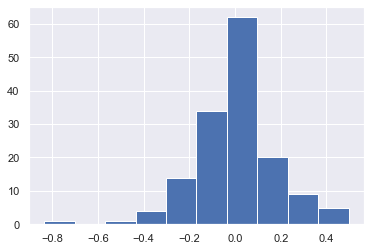

In [55]:
data_all["Diff"] = data_all["Score 2017"] - data_all["Score 2016"]
pl = data_all["Diff"].hist()

### Úloha 8.2

Načítajte dáta World Happiness Record 2017.

* Vyberte do tabuľky iba základné faktory (`GDP`, `Family`, `Health`, `Freedom`, `Trust`, `Generosity`).
* Normalizujte dáta do intervalu 0-1.
* Pridajte do normalizovanej tabuľky názvy štátov a regiónov.
* Uložte dáta do Excel súboru.

In [65]:
table = pd.read_csv("../data/2017.csv")

data_2017 = pd.read_csv("../data/2017.csv")
data_2017 = table[["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
min_max = MinMaxScaler()
norm_array = min_max.fit_transform(data_2017)
data_2017 = pd.DataFrame(norm_array, columns=data_2017.columns)
data_2017["Region"] = table["Region"]

data_2017.to_excel("../data/2017_uloha.xlsx", index=False)
data_2017.head()

,GDP,Family,Health,Freedom,Trust,Generosity,Region
0,0.864065,0.952160,0.839045,0.965323,0.680505,0.431957,Western Europe
1,0.792394,0.963086,0.834726,0.951019,0.863156,0.423924,Western Europe
2,0.791458,1.000000,0.877892,0.952775,0.330657,0.567420,Western Europe
3,0.836545,0.941845,0.903779,0.942001,0.790440,0.346686,Western Europe
4,0.771648,0.956334,0.852200,0.938780,0.824047,0.292913,Western Europe


### Úloha 8.3

Načítajte predspracované dáta z predchádzajúcej úlohy.

* Vypočítajte dve hlavné komponenty.
* Vizualizujte hlavné komponenty na X-Y grafe, ako farbu zobrazte región štátu.

Čo viete povedať o centrálnej Európe? Koľko celkovej variancie pôvodných dát je zachovaných vo vizualizácii?

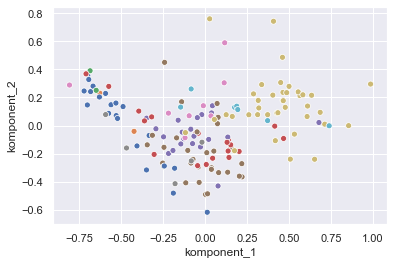

In [69]:
table = pd.read_excel("../data/2017_uloha.xlsx")

data = table[["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
pca = PCA(n_components=2)
pca_array = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_array, columns=["komponent_1", "komponent_2"])

pca_data["Region"] = table["Region"]

pl = sns.scatterplot(data=pca_data, x="komponent_1", y="komponent_2", hue="Region", legend=False)